In [9]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re

In [3]:
# Upload file dari lokal
from google.colab import files
uploaded = files.upload()

# Baca CSV (asumsikan tidak ada header)
df = pd.read_csv(list(uploaded.keys())[0], header=None, names=["komentar"])
df.dropna(inplace=True)
df.head()


Saving Dataset-komentar.csv to Dataset-komentar.csv


,komentar
0,yatuhan💔
1,"Do not know why, but I love this idea..."
2,Sakit!
3,SAKIT
4,SAKIT!!!


In [10]:
#Preprocessing Komentar
def bersihkan_teks(teks):
    teks = str(teks).lower()
    teks = re.sub(r"http\S+", "", teks)              # hapus link
    teks = re.sub(r"[^a-zA-Z\s]", "", teks)          # hapus simbol
    teks = re.sub(r"\s+", " ", teks).strip()         # hapus spasi berlebih
    return teks

df["komentar_bersih"] = df["komentar"].apply(bersihkan_teks)
df.head()


,komentar,komentar_bersih,sentimen
0,yatuhan💔,yatuhan,Netral
1,"Do not know why, but I love this idea...",do not know why but i love this idea,Positif
2,Sakit!,sakit,Netral
3,SAKIT,sakit,Netral
4,SAKIT!!!,sakit,Netral


In [5]:
#Analisis Sentimen (TextBlob)
def analisis_sentimen(teks):
    skor = TextBlob(teks).sentiment.polarity
    if skor > 0:
        return "Positif"
    elif skor < 0:
        return "Negatif"
    else:
        return "Netral"

df["sentimen"] = df["komentar_bersih"].apply(analisis_sentimen)
df.head()


,komentar,komentar_bersih,sentimen
0,yatuhan💔,yatuhan,Netral
1,"Do not know why, but I love this idea...",do not know why but i love this idea,Positif
2,Sakit!,sakit,Netral
3,SAKIT,sakit,Netral
4,SAKIT!!!,sakit,Netral


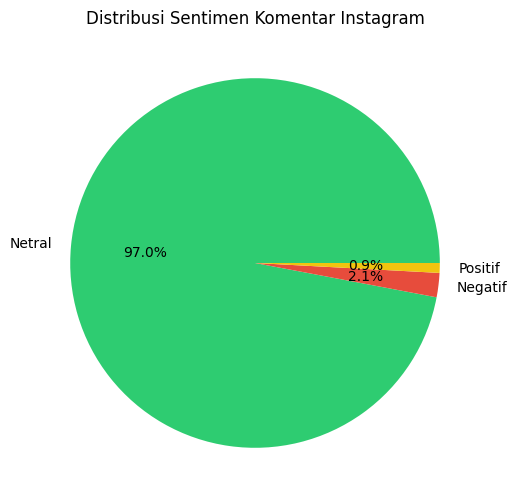

In [11]:
#Visualisasi Hasil
# Pie chart distribusi sentimen
sentimen_counts = df["sentimen"].value_counts()
colors = ['#2ecc71', '#e74c3c', '#f1c40f']
plt.figure(figsize=(6,6))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', colors=colors)
plt.title("Distribusi Sentimen Komentar Instagram")
plt.show()


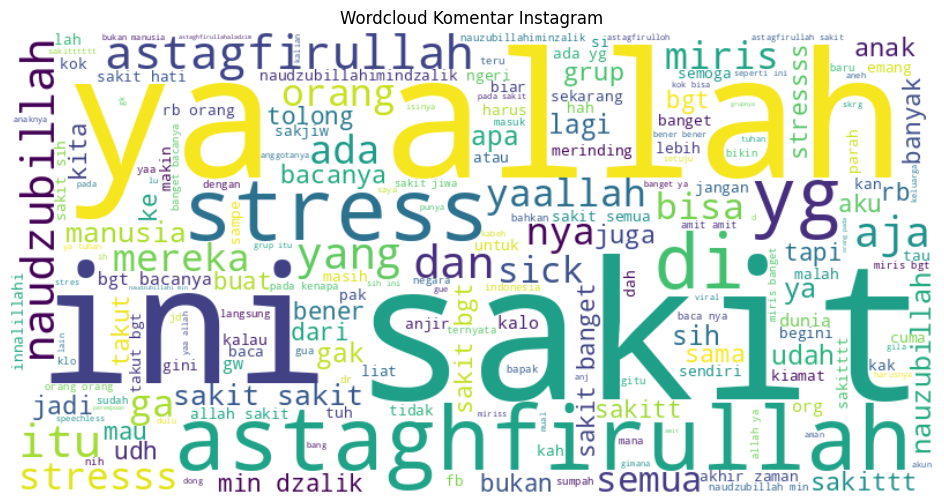

In [7]:
#Wordcloud
all_text = ' '.join(df['komentar_bersih'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud Komentar Instagram")
plt.show()


/tmp/ipython-input-12-233727074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen', data=df, palette='Set2')


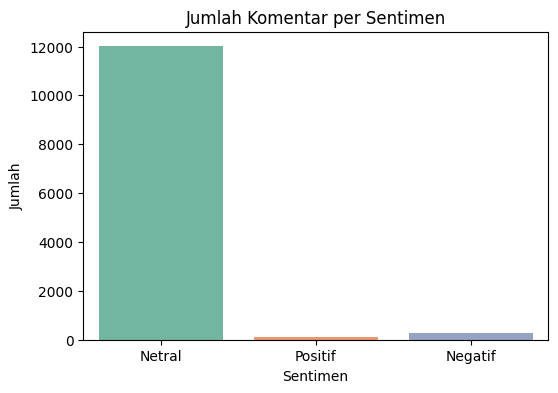

In [12]:
#Bar Chart Jumlah Sentimen
plt.figure(figsize=(6,4))
sns.countplot(x='sentimen', data=df, palette='Set2')
plt.title("Jumlah Komentar per Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()


“Dari hasil analisis, ditemukan bahwa komentar bersentimen negatif mendominasi. Ini mencerminkan ketidakterimaan masyarakat terhadap konten yang bertentangan dengan nilai moral.